## **Breast Cancer Wisconsin (Diagnostic) Data Set**
## **Predict whether the FNA sample is benign or malignant**

<h2 align="center">Benign VS Malignant FNA</h2> <img src="https://raw.githubusercontent.com/brianfarrelly/data/master/SMEAR.png">



“Down to their innate molecular core, cancer cells are hyperactive, survival-endowed, scrappy, fecund, inventive copies of ourselves.”
― Siddhartha Mukherjee, The Emperor of All Maladies: A Biography of Cancer


“In God we trust. All others [must] have data. - Bernard Fisher”
― Siddhartha Mukherjee, The Emperor of All Maladies: A Biography of Cancer 

The dataset I selected for this project is from Kaggle. It is highly rated on Kaggle and has been there for 3 years.

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data


The dataset I selected for this project is from Kaggle. It is highly rated on Kaggle and has been there for 3 years. 

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data


Preliminary Data Exploration Below. The p-values being returned are extremely LOW. I have some concern about the data set being too small.  Medical testing by it's nature typically deals with smaller samples.


In [16]:
The skewness and kurtosis of the histograms are a bit 
high but I believe they are in range for a t-test. 
I believe all the variables are continuous and can 
be t-tested.

SyntaxError: invalid syntax (<ipython-input-16-2dabc5500bf1>, line 1)

This file is posted here and on google colab.

https://github.com/brianfarrelly/data/blob/master/report_cap1.ipynb


In [ ]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Open the csv datafile hosted on my github at https://github.com/brianfarrelly/data
The dataset has 569 rows and 33 columns. There are 31 columns of variables with continuous values. The data will be divided in 2 on the diagnosis variable that has 2 values M for malignant and B for benign.

In [ ]:
PATH = 'https://raw.githubusercontent.com/brianfarrelly/data/master/breast_cancer_WI.csv'
df = pd.read_csv(PATH)

In [ ]:
bcdata = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean']]
bcdata.info()

Take a peak at the dataset, so far so good.


In [98]:
bcdata.head()
bcdata.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean
0,M,17.99,10.38,122.80
1,M,20.57,17.77,132.90
2,M,19.69,21.25,130.00
3,M,11.42,20.38,77.58
4,M,20.29,14.34,135.10


,diagnosis,radius_mean,texture_mean,perimeter_mean
564,M,21.56,22.39,142.00
565,M,20.13,28.25,131.20
566,M,16.60,28.08,108.30
567,M,20.60,29.33,140.10
568,B,7.76,24.54,47.92


Below I just check for Null values for any of the columns I am using for this data analysis. The entire dataset has no null values for named columns. So there will be no cleaning of the data for Nulls for this data.

In [ ]:
bcdata.diagnosis.isnull().sum()

In [ ]:
bcdata.radius_mean.isnull().sum()

In [ ]:
bcdata.texture_mean.isnull().sum()

In [ ]:
bcdata.perimeter_mean.isnull().sum()

Again confirm there are 569 rows of data.

In [ ]:
len(bcdata)

Below check that the diagnosis column has 2 unique values and that they are 'M' and 'B'.

In [ ]:
bcdata.diagnosis.nunique()

In [ ]:
bcdata.diagnosis.unique()

Below scatterplot and do a Pearson's correlation between radius_mean and perimeter mean. Not surprising the correlation between the radius of a nucleus of a cell and the perimeter is a very high postive correlation. Just as the radius of a circle is highly correlated to its circumfrence. In this case it is the mean of a lot of cells radius correlated to the mean of the same lot of cells perimeters.
  

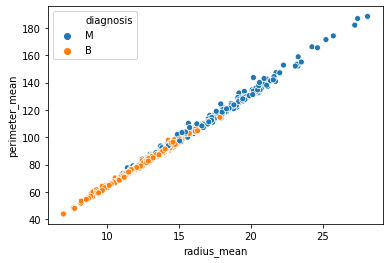

In [99]:
sns.scatterplot(bcdata['radius_mean'], bcdata['perimeter_mean'], 
                hue=bcdata['diagnosis'] )

In [ ]:
stats.pearsonr(bcdata['radius_mean'], bcdata['perimeter_mean'] )

It seems the size of a sample of cells is not highly correlated to it's texture.


In [ ]:
stats.pearsonr(bcdata['radius_mean'], bcdata['texture_mean'] )

In [ ]:
stats.pearsonr(bcdata['perimeter_mean'], bcdata['texture_mean'])

Use describe() on radius_mean, texture_mean and perimeter_mean columns. Note the standard deviation for each is 3.5, 4.3 and 91.9 respectively.

In [ ]:
bcdata.radius_mean.describe()

In [ ]:
bcdata.texture_mean.describe()

In [17]:
bcdata.perimeter_mean.describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

Plot the histograms for radius_mean, texture_mean and perimeter_mean. They seem to pass the eyeball test for being relatively normalized data. Note that the color magenta is used because bright pink is the official color of breast cancer.

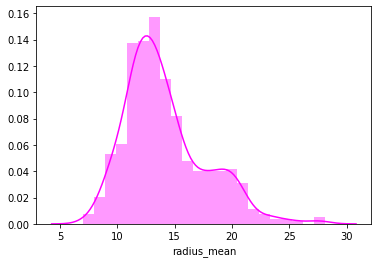

In [18]:
ax = sns.distplot(bcdata['radius_mean'], color='magenta')

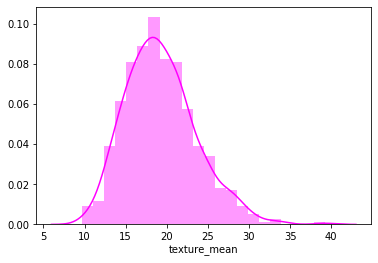

In [19]:
ax = sns.distplot(bcdata['texture_mean'], color='magenta')

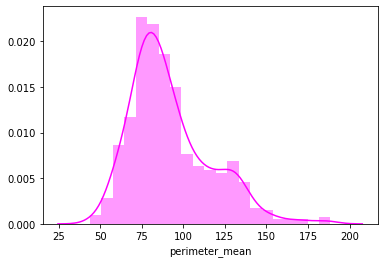

In [20]:
ax = sns.distplot(bcdata['perimeter_mean'], color='magenta')

Make swarmplots for radius_mean, texture_mean and perimeter_mean. Note the considerable number of outliers displayed in all three graphs. 

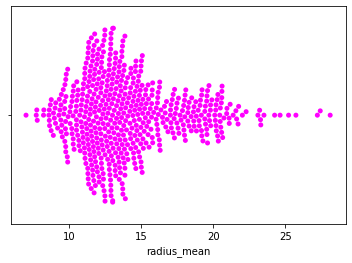

In [21]:
sns.swarmplot(bcdata['radius_mean'], color='magenta')

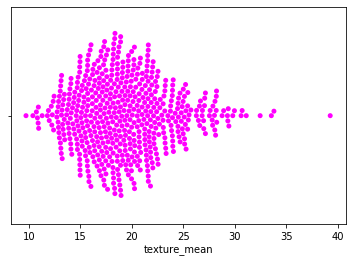

In [22]:
sns.swarmplot(bcdata['texture_mean'], color='magenta')

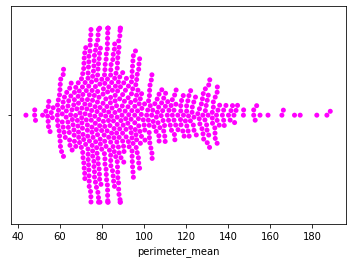

In [23]:
sns.swarmplot(bcdata['perimeter_mean'], color='magenta')

Do a shapiro test for radius_mean, texture_mean and perimeter_mean. All 3 variables return a W value close to 1. Unfortunately all three variables spectacularly fail the Shapiro test for normality because their p-values returned are all way below the 0.05 threshold. All three variables will be considered non-normal. I have decided to t-test all 3 of them anyway to see those results but not be using t-test results in the final analysis.
 

In [24]:
stats.shapiro(bcdata['radius_mean'])

(0.9410696029663086, 3.1061551985026026e-14)

In [25]:
stats.shapiro(bcdata['texture_mean'])

(0.9767200946807861, 7.281473557441132e-08)

In [26]:
stats.shapiro(bcdata['perimeter_mean'])

(0.9361826181411743, 7.01163031715385e-15)

Even though radius_mean, texture_mean and perimeter_mean all failed the shapiro test. Their skew and kurtosis are all in a decent range with kurtosis being well under +/-2.5 and skew under +/- 1.5. That makes a pretty good case for normality. I suspect the outliers that were spotted in the swarmplots and will show up elsewhere here and the fact that these are fairly small datasets that the shapiro tests were failed.

In [27]:
print(stats.describe(bcdata['radius_mean']))
print(stats.describe(bcdata['texture_mean']))
print(stats.describe(bcdata['perimeter_mean']))


DescribeResult(nobs=569, minmax=(6.981, 28.11), mean=14.127291739894552, variance=12.418920129526722, skewness=0.9398934455576345, kurtosis=0.8275836739140465)
DescribeResult(nobs=569, minmax=(9.71, 39.28), mean=19.289648506151142, variance=18.49890867905146, skewness=0.6487335672867015, kurtosis=0.74114542022429)
DescribeResult(nobs=569, minmax=(43.79, 188.5), mean=91.96903339191564, variance=590.4404795217704, skewness=0.9880369541677213, kurtosis=0.9531650486734948)


Boxplot radius_mean, texture_mean and perimeter mean and compare the data in the malignant versus benign samples. Notable here is the outliers a good distance from the means. Also in all 3 cases the means of malignant sample are significantly larger than the benign sample.


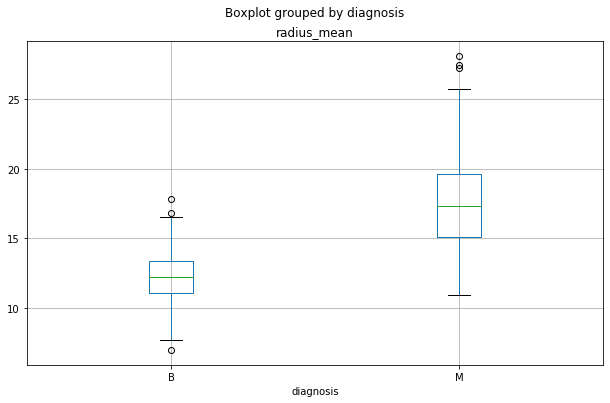

In [28]:
bcdata.boxplot('radius_mean', by='diagnosis', figsize=(10, 6))

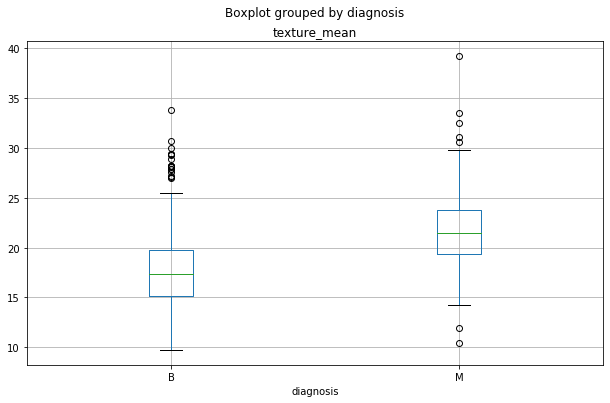

In [29]:
bcdata.boxplot('texture_mean', by='diagnosis', figsize=(10, 6))

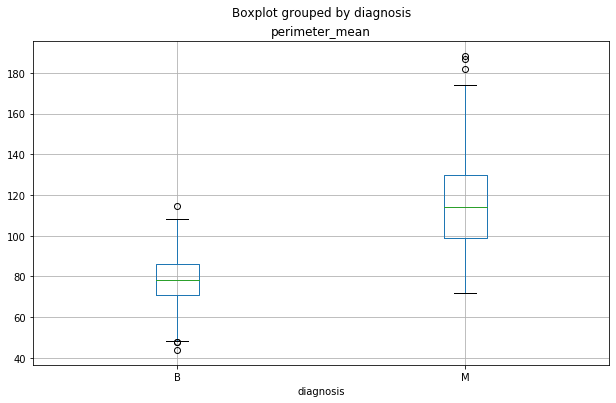

In [30]:
bcdata.boxplot('perimeter_mean', by='diagnosis', figsize=(10, 6))

Divide the data into two datasets Malignant and Benign. From here all comparisons will be between these two datasets. The AB test of this experiment will be the malignant versus the benign results. Is the malignant results for the 3 variables radius_mean, texture_mean and perimeter mean significantly different than the benign results. If they are significantly different this will point to these values being important features in determining if a sample is malignant or benign. If they are not then these values might not be useful for diagnostic purposes.  

In [31]:
bcdata_M = bcdata[bcdata['diagnosis']== 'M']

bcdata_B = bcdata[bcdata['diagnosis']== 'B']


There are 212 Malignant results and 357 Benign results.

In [32]:
len(bcdata_M)

212

In [33]:
len(bcdata_B)

357

Another peak at the malignant and benign datasets.

In [34]:
bcdata_M.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean
0,M,17.99,10.38,122.80
1,M,20.57,17.77,132.90
2,M,19.69,21.25,130.00
3,M,11.42,20.38,77.58
4,M,20.29,14.34,135.10


In [35]:
bcdata_B.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean
19,B,13.540,14.36,87.46
20,B,13.080,15.71,85.63
21,B,9.504,12.44,60.34
37,B,13.030,18.42,82.61
46,B,8.196,16.84,51.71


Plot the histograms of radius_mean, texture_mean and perimeter mean divided up into the malignant and benign datasets. A couple of plataeus noticed on the malignant datasets.


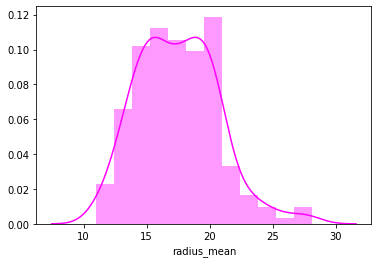

In [36]:
ax = sns.distplot(bcdata_M['radius_mean'], color='magenta')

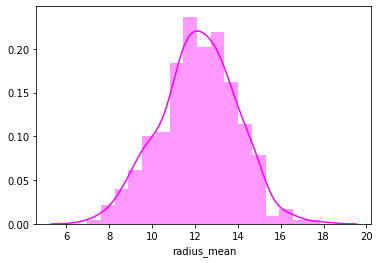

In [37]:
ax = sns.distplot(bcdata_B['radius_mean'], color='magenta')

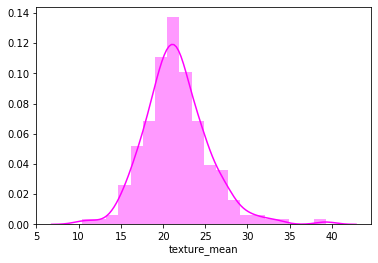

In [38]:
ax = sns.distplot(bcdata_M['texture_mean'], color='magenta')

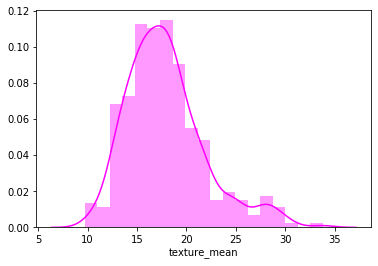

In [39]:
ax = sns.distplot(bcdata_B['texture_mean'], color='magenta')

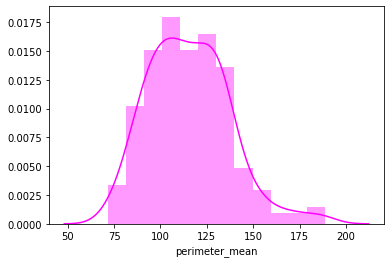

In [40]:
ax = sns.distplot(bcdata_M['perimeter_mean'], color='magenta')

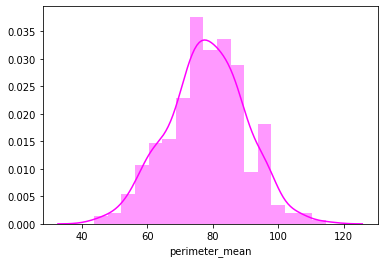

In [41]:
ax = sns.distplot(bcdata_B['perimeter_mean'], color='magenta')

Six swarmplots show that all three variables and the malignant and benign datasets all have outliers a noticeable distance from the mean.

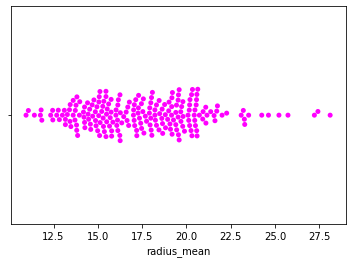

In [42]:
sns.swarmplot(bcdata_M['radius_mean'], color='magenta')

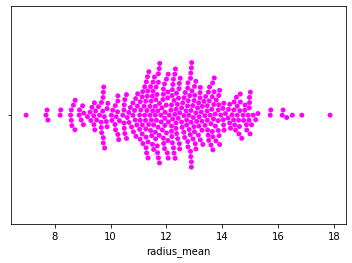

In [43]:
sns.swarmplot(bcdata_B['radius_mean'], color='magenta')

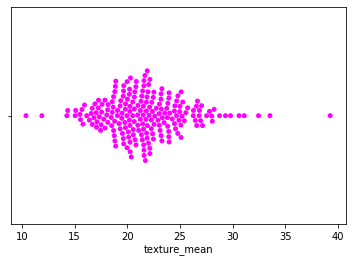

In [44]:
sns.swarmplot(bcdata_M['texture_mean'], color='magenta')

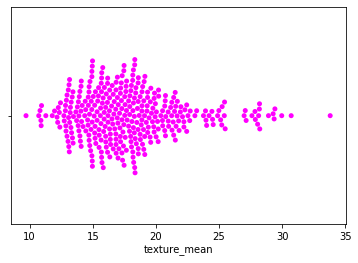

In [45]:
sns.swarmplot(bcdata_B['texture_mean'], color='magenta')

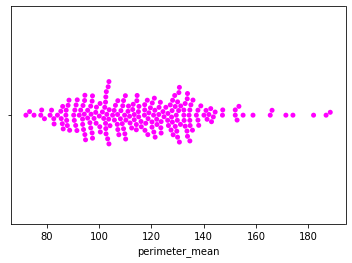

In [46]:
sns.swarmplot(bcdata_M['perimeter_mean'], color='magenta')

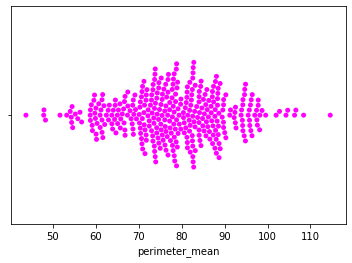

In [47]:
sns.swarmplot(bcdata_B['perimeter_mean'], color='magenta')

Again describe the data for all three variables in the 2 samples. The skew and kurtosis are all within range. The kurtosis for texture_mean in the malignant dataset is getting very close to out of range with a value of 2.29. But skew and kurtosis all indicate normalized data for both malignant and benign samples.

In [48]:
print(stats.describe(bcdata_M['radius_mean']))
print(stats.describe(bcdata_M['texture_mean']))
print(stats.describe(bcdata_M['perimeter_mean']))


DescribeResult(nobs=212, minmax=(10.95, 28.11), mean=17.462830188679245, variance=10.26543081462935, skewness=0.4983438269401485, kurtosis=0.33744620499587263)
DescribeResult(nobs=212, minmax=(10.38, 39.28), mean=21.60490566037736, variance=14.284392882053115, skewness=0.6985549130264693, kurtosis=2.2951980794284896)
DescribeResult(nobs=212, minmax=(71.9, 188.5), mean=115.36537735849056, variance=477.6258704730394, skewness=0.6006419795948119, kurtosis=0.5492077385280698)


In [49]:
print(stats.describe(bcdata_B['radius_mean']))
print(stats.describe(bcdata_B['texture_mean']))
print(stats.describe(bcdata_B['perimeter_mean']))


DescribeResult(nobs=357, minmax=(6.981, 17.85), mean=12.146523809523808, variance=3.1702217220438738, skewness=-0.08344660198964896, kurtosis=-0.028871551594101152)
DescribeResult(nobs=357, minmax=(9.71, 33.81), mean=17.914761904761903, variance=15.961020518994113, skewness=0.9772157090288104, kurtosis=1.1858758625694934)
DescribeResult(nobs=357, minmax=(43.79, 114.6), mean=78.075406162465, variance=139.41558220816415, skewness=-0.06441193810264673, kurtosis=-0.03299354965402257)


Here I test all three variables to the 2 datasets. In this case the malignant data all fail the shapiro test but the benign data pass the shapiro test easily. This is interesting. What is it about the malignant data that causes it to fail the normality test? 

Below I tested the number of unique values of each variable we are testing. There is some repeated values, but I do not think there are so many to severely throw off normality tests.


In [50]:
print(len(bcdata_M))
print(bcdata_M.radius_mean.nunique())
print(bcdata_M.texture_mean.nunique())
print(bcdata_M.perimeter_mean.nunique())

212
196
199
191


In [51]:
print(len(bcdata_B))
print(bcdata_B.radius_mean.nunique())
print(bcdata_B.texture_mean.nunique())
print(bcdata_B.perimeter_mean.nunique())

357
284
311
338


In [52]:
stats.shapiro(bcdata_M['radius_mean'])

(0.9776597619056702, 0.0018945835763588548)

In [53]:
stats.shapiro(bcdata_M['texture_mean'])

(0.9690946340560913, 0.00013415660941973329)

In [54]:
stats.shapiro(bcdata_M['perimeter_mean'])

(0.9730151891708374, 0.00043255911441519856)

In [55]:
stats.shapiro(bcdata_B['radius_mean'])

(0.9966526031494141, 0.6678557395935059)

In [56]:
stats.shapiro(bcdata_B['texture_mean'])

(0.9441728591918945, 2.384618336126465e-10)

In [57]:
stats.shapiro(bcdata_B['perimeter_mean'])

(0.9970958232879639, 0.7793931365013123)

Below I test the 3 variables and two datasets for outliers by making a top ten list of zscores for results that reside far from the mean. Across the 3 variables and both malignant and benign data there are significant outliers everywhere. But yet the malignant data failed the shapiro test.


In [58]:
def print_top5bot5(zlist):
  zlist.sort()
  zlist.size
  print(zlist[0:5])
  print(zlist[-5:-1]) 
  print(zlist[-1])

In [59]:
print_top5bot5(stats.zscore(bcdata_M['radius_mean']))

[-2.03754809 -1.99687741 -1.89050793 -1.78413845 -1.77162439]
[2.42684149 2.58639571 3.0525443  3.11511459]
3.330982057202953


In [60]:
print_top5bot5(stats.zscore(bcdata_B['radius_mean']))

[-2.90521754 -2.50589609 -2.48452396 -2.4670888  -2.22187168]
[2.26290189 2.33601709 2.44850201 2.63972636]
3.20777518398041


In [61]:
print_top5bot5(stats.zscore(bcdata_M['texture_mean']))

[-2.97699777 -2.57652522 -1.94796896 -1.92675187 -1.7384502 ]
[2.39092573 2.52353253 2.88157091 3.17065375]
4.687675603281357


In [62]:
print_top5bot5(stats.zscore(bcdata_B['texture_mean']))

[-2.056576   -1.80341305 -1.77834741 -1.76080146 -1.75578833]
[2.87132863 2.88636801 3.02172247 3.20971476]
3.984243003963385


In [63]:
print_top5bot5(stats.zscore(bcdata_M['perimeter_mean']))

[-1.99354588 -1.92933468 -1.85136393 -1.73303185 -1.71697905]
[2.57462267 2.69845857 3.06079322 3.28094592]
3.3543301559559904


In [64]:
print_top5bot5(stats.zscore(bcdata_B['perimeter_mean']))

[-2.90778806 -2.55751761 -2.55242894 -2.52189689 -2.23608298]
[2.25806501 2.39376301 2.41920638 2.57186663]
3.0976963631991823


Here I throw the kitchen sink at radius_mean to see that comes back. I ttest, kruskal, median and mannwhitney test radius_mean. 

In [ ]:
And they all fail to reject the NULL hypothesis because 
the p-values are extremely low. I will run the 4 tests 
on texture_mean and perimeter mean as well.


In [65]:
stats.ttest_ind(bcdata_M['radius_mean'], bcdata_B['radius_mean'])


Ttest_indResult(statistic=25.435821610057054, pvalue=8.465940572262422e-96)

In [66]:
stats.kruskal(bcdata_M['radius_mean'], bcdata_B['radius_mean'])

KruskalResult(statistic=305.00114169591234, pvalue=2.680528928198788e-68)

In [67]:
stats.median_test(bcdata_M['radius_mean'], bcdata_B['radius_mean'])


(236.52797526117857, 2.247938676287646e-53, 13.37, array([[195,  89],
        [ 17, 268]], dtype=int64))

In [68]:
stats.mannwhitneyu(bcdata_M['radius_mean'], bcdata_B['radius_mean'])

MannwhitneyuResult(statistic=4729.0, pvalue=1.3464713863982824e-68)

Here texture_mean fails to reject the NULL for all 4 tests again with very low p-values.

In [69]:
stats.ttest_ind(bcdata_M['texture_mean'], bcdata_B['texture_mean'])


Ttest_indResult(statistic=10.86720108146434, pvalue=4.0586360478980736e-25)

In [70]:
stats.kruskal(bcdata_M['texture_mean'], bcdata_B['texture_mean'])


KruskalResult(statistic=121.22093055992241, pvalue=3.418605714119009e-28)

In [71]:
stats.median_test(bcdata_M['texture_mean'], bcdata_B['texture_mean'])


(107.13187769388985, 4.165102795584876e-25, 18.84, array([[166, 118],
        [ 46, 239]], dtype=int64))

In [72]:
stats.mannwhitneyu(bcdata_M['texture_mean'], bcdata_B['texture_mean'])

MannwhitneyuResult(statistic=16966.5, pvalue=1.7143132523721134e-28)

And perimeter_mean fails to reject the NULL as well for all four tests.


In [73]:
stats.ttest_ind(bcdata_M['perimeter_mean'], bcdata_B['perimeter_mean'])

Ttest_indResult(statistic=26.405212979192665, pvalue=8.43625103617473e-101)

In [74]:
stats.kruskal(bcdata_M['perimeter_mean'], bcdata_B['perimeter_mean'])


KruskalResult(statistic=318.21988483157037, pvalue=3.537139549987364e-71)

In [75]:
stats.median_test(bcdata_M['perimeter_mean'], bcdata_B['perimeter_mean'])


(241.89208463622737, 1.5210841058376233e-54, 86.24, array([[196,  88],
        [ 16, 269]], dtype=int64))

In [76]:
stats.mannwhitneyu(bcdata_M['perimeter_mean'], bcdata_B['perimeter_mean'])

MannwhitneyuResult(statistic=4019.0, pvalue=1.7769351129819374e-71)

Just being curious I run one way anova on all 3 variables to see what the p-value is there as well. Again very low p-values.

In [77]:
stats.f_oneway(bcdata_M['radius_mean'], bcdata_B['radius_mean'])

F_onewayResult(statistic=646.9810209786452, pvalue=8.46594057226382e-96)

In [78]:
stats.f_oneway(bcdata_M['texture_mean'], bcdata_B['texture_mean'])

F_onewayResult(statistic=118.09605934497965, pvalue=4.0586360478986136e-25)

In [79]:
stats.f_oneway(bcdata_M['perimeter_mean'], bcdata_B['perimeter_mean'])

F_onewayResult(statistic=697.2352724765257, pvalue=8.43625103617395e-101)

In [80]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")



I run a 95% confidence interval on all three variables. 
The standard deviation for the radius_mean for the entire data was 3.5 and the difference between malignant and benign is 130% to 160% of the std. That is definitely a significant difference. 
Texture_mean is 85% to 100% difference of the standard deviation. Perimeter_mean is %140 to %166 of the original standard deviation as well. This was noticeable in the boxplot and comparing the histogram  plots of the malignant and benign datasets.

The standard deviation of the entire data was 3.5, 4.3 and 91.9 respectively for those 3 variables.



In [81]:
print(get_95_ci(bcdata_B['radius_mean'], bcdata_M['radius_mean']));

The difference in means at the 95% confidence interval (two-tail) is between 4.847124723467965 and 5.7854880348429125.


In [82]:
print(get_95_ci(bcdata_B['texture_mean'], bcdata_M['texture_mean']));

The difference in means at the 95% confidence interval (two-tail) is between 3.0339447927021377 and 4.34634271852878.


In [83]:
print(get_95_ci(bcdata_B['perimeter_mean'], bcdata_M['perimeter_mean']));

The difference in means at the 95% confidence interval (two-tail) is between 34.10325466400698 and 40.47668772804431.


Last thing is to run a pointplot to show visually there is a significant difference between the malignant and benign data sets for radius_mean, texture_mean, and perimeter_mean. The values are higher in the malignant dataset for all three values. 

[[Text(0, 0, 'Malignant Radius'), Text(0, 0, 'Benign Radius')]]

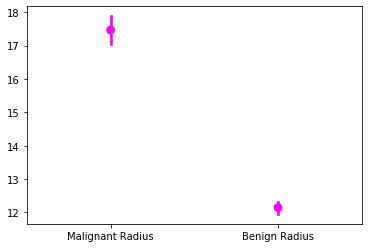

In [97]:
g = sns.pointplot(data=[bcdata_M['radius_mean'], bcdata_B['radius_mean']], 
                  join=False, color='magenta')                        
g.set(xticklabels = ['Malignant Radius', 'Benign Radius'])
plt.show()

[[Text(0, 0, 'Malignant Texture'), Text(0, 0, 'Benign Texture')]]

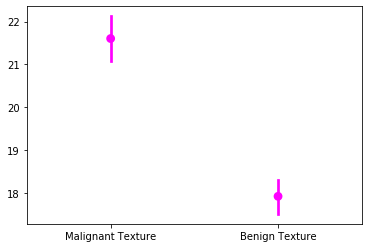

In [95]:
g = sns.pointplot(data=[bcdata_M['texture_mean'], bcdata_B['texture_mean']], 
                  join=False, color='magenta')              
g.set(xticklabels = ['Malignant Texture', 'Benign Texture'])
plt.show()

[[Text(0, 0, 'Malignant Perimeter'), Text(0, 0, 'Benign Perimeter')]]

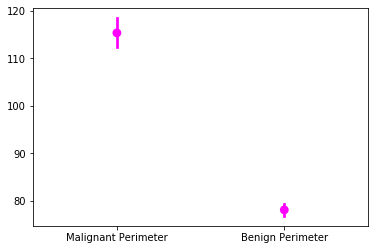

In [96]:
g = sns.pointplot(data=[bcdata_M['perimeter_mean'], bcdata_B['perimeter_mean']], 
                  join=False, color='magenta')              
g.set(xticklabels = ['Malignant Perimeter', 'Benign Perimeter'])
plt.show()

Summary:

The conclusion of these results is that for radius_mean, texture_mean and perimeter_mean the values for all three would be larger in a malignant sample of breast cancer cells collected from a FNA needle biopsy. There are 28 other variables just in this data provided and those would also need to be analyzed to understand these results. 

The data assembled for this project may have been assembled specifically for machine learning testing. It just happened to fit the purposes for an AB test for this project. 

The other issue is the size of the dataset. It may be quite large for these sorts for medical testing studies. It may be that medical studies just have to deal with smaller and thus non-normal datasets and being able to work with these problems is the nature of the problem.

If I could collect more data for this project I would like to have data from other states besides Wisconsin. Also the data was collected in 1995 so it is 25 years old. The instruments used to create this data are probably much better than what was used back then. If the images are digitized, I am sure the images collected today are much higher resolution. Also since 1995 there is been a lot of work with genetic testing. It would be nice to see what genetic testing data collected from needle biopsy could or would be included from cell samples taken today. And before the needle biopsy CT scans and MRI scans of the patient to show the entire tumor and perhaps other tumors in the same area would be even more data to consider. Size of the overall tumor was not considered here but would be signicant information to add to the overall picture and improve the diagnostic process. 
